<a href="https://colab.research.google.com/github/Ash100/Documents/blob/main/Bu-Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Combined SMILES: COc1cc([C@@H]2c3cc4c(cc3[C@H](O)[C@H]3C(CN(C)C(=N)N=C(N)N)OC(=O)[C@H]23)OCO4)cc(OC)c1OC


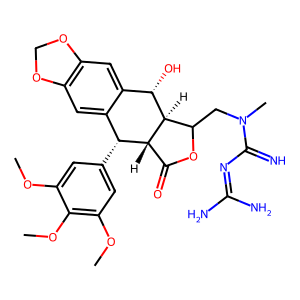

In [12]:
# Install RDKit
!pip install rdkit

from rdkit import Chem
from rdkit.Chem import AllChem, Draw

def combine_smiles(smiles1, smiles2, atom1_idx, atom2_idx, bond_type=Chem.rdchem.BondType.SINGLE):
    """
    Combines two molecules based on provided SMILES and connection points.
    """
    # Convert SMILES to RDKit molecule objects
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)

    # Add hydrogens for explicit valence handling
    mol1 = Chem.AddHs(mol1)
    mol2 = Chem.AddHs(mol2)

    # Combine the molecules
    combo = Chem.RWMol(Chem.CombineMols(mol1, mol2))

    # Adjust atom indices for mol2 (starts after mol1's atom count)
    mol2_start_idx = mol1.GetNumAtoms()
    atom2_idx += mol2_start_idx

    # Add the bond between the two specified atoms
    combo.AddBond(atom1_idx, atom2_idx, bond_type)

    # Remove explicit hydrogens and sanitize the molecule
    combo = Chem.RemoveHs(combo)
    Chem.SanitizeMol(combo)

    return combo

# Input SMILES (replace with your own)
smiles1 = "COC1=CC(=CC(=C1OC)OC)[C@H]2[C@@H]3[C@H](COC3=O)[C@H](C4=CC5=C(C=C24)OCO5)O"  # Rohitukine
smiles2 = "CN(C)C(=N)N=C(N)N"  # Metformin

# Specify connection points (atom indices)
# Adjust indices based on inspection (use RDKit's Chem.MolFromSmiles().GetAtoms() to find proper indices)
atom1_idx = 15  # Example index from Rohitukine
atom2_idx = 0   # Example index from Metformin (Nitrogen)

# Combine molecules
combined_molecule = combine_smiles(smiles1, smiles2, atom1_idx, atom2_idx)

# Generate SMILES and visualize
combined_smiles = Chem.MolToSmiles(combined_molecule)
print("Combined SMILES:", combined_smiles)

# Visualize the molecule
Draw.MolToImage(combined_molecule)
